# **Keyword Analysis based on BoW approach**
## Individual Accounts & Aggregated Accounts
## Bar Chart & Word Cloud Generation
####datasets = [bbc_df, cnn_df, nbc_df, bloom_df, nyt_df, wsj_df]

In [1]:
import pandas as pd
import numpy as np

In [3]:
bbc_df = pd.read_csv("clean_bbc_nf.csv", encoding='latin-1')
cnn_df = pd.read_csv("clean_cnn_nf.csv", encoding='latin-1')
nbc_df = pd.read_csv("clean_nbc_nf.csv", encoding='latin-1')
bloom_df = pd.read_csv("clean_bloom_nf.csv", encoding='latin-1')
nyt_df = pd.read_csv("clean_nyt_nf.csv", encoding='latin-1')
wsj_df = pd.read_csv("clean_wsj_nf.csv", encoding='latin-1')

datasets = [bbc_df, cnn_df, nbc_df, bloom_df, nyt_df, wsj_df]

In [4]:
#DataFrame with just 'text' feature

bbc_df = bbc_df[['text']]
cnn_df = cnn_df[['text']]
nbc_df = nbc_df[['text']]
bloom_df = bloom_df[['text']]
nyt_df = nyt_df[['text']]
wsj_df = wsj_df[['text']]

In [ ]:
#Obtain BoW List

bbc_df['raw_bow_list'] = bbc_df['text'].apply(lambda x: x.split(" "))
cnn_df['raw_bow_list'] = cnn_df['text'].apply(lambda x: x.split(" "))
nbc_df['raw_bow_list'] = nbc_df['text'].apply(lambda x: x.split(" "))
bloom_df['raw_bow_list'] = bloom_df['text'].apply(lambda x: x.split(" "))
nyt_df['raw_bow_list'] = nyt_df['text'].apply(lambda x: x.split(" "))
wsj_df['raw_bow_list'] = wsj_df['text'].apply(lambda x: x.split(" "))

In [7]:
#Raw BoW object in str and list form

raw_bbc_words_str = ''
raw_cnn_words_str = ''
raw_nbc_words_str = ''
raw_bloom_words_str = ''
raw_nyt_words_str = ''
raw_wsj_words_str = ''

for i in range(bbc_df.shape[0]):
    raw_bbc_words_str += bbc_df.iloc[i,0]

for i in range(cnn_df.shape[0]):
    raw_cnn_words_str += cnn_df.iloc[i,0]

for i in range(nbc_df.shape[0]):
    raw_nbc_words_str += nbc_df.iloc[i,0]

for i in range(bloom_df.shape[0]):
    raw_bloom_words_str += bloom_df.iloc[i,0]

for i in range(nyt_df.shape[0]):
    raw_nyt_words_str += nyt_df.iloc[i,0]

for i in range(wsj_df.shape[0]):
    raw_wsj_words_str += wsj_df.iloc[i,0]

raw_bow_str = raw_bbc_words_str + raw_cnn_words_str + raw_nbc_words_str + raw_bloom_words_str + raw_nyt_words_str + raw_wsj_words_str 
raw_bow_list = list(raw_bow_str.split(" "))

raw_bbc_words_list = raw_bbc_words_str.split(" ")
raw_cnn_words_list = raw_cnn_words_str.split(" ")
raw_nbc_words_list = raw_nbc_words_str.split(" ")
raw_bloom_words_list = raw_bloom_words_str.split(" ")
raw_nyt_words_list = raw_nyt_words_str.split(" ")
raw_wsj_words_list = raw_wsj_words_str.split(" ")

##Stop Word Removal

In [10]:
#Getting the stopwords corpus
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [11]:
bow_list = [t for t in raw_bow_list if t not in stop]
bow_str = ' '.join([str(elem) for elem in bow_list]) 

raw_bbc_words_list = raw_bbc_words_str.split(" ")
bbc_words_list = [t for t in raw_bbc_words_list if t not in stop]
bbc_words_str = ' '.join([str(elem) for elem in bbc_words_list])

raw_cnn_words_list = raw_cnn_words_str.split(" ")
cnn_words_list = [t for t in raw_cnn_words_list if t not in stop]
cnn_words_str = ' '.join([str(elem) for elem in cnn_words_list])

raw_nbc_words_list = raw_nbc_words_str.split(" ")
nbc_words_list = [t for t in raw_nbc_words_list if t not in stop]
nbc_words_str = ' '.join([str(elem) for elem in nbc_words_list])

raw_bloom_words_list = raw_bloom_words_str.split(" ")
bloom_words_list = [t for t in raw_bloom_words_list if t not in stop]
bloom_words_str = ' '.join([str(elem) for elem in bloom_words_list])

raw_nyt_words_list = raw_nyt_words_str.split(" ")
nyt_words_list = [t for t in raw_nyt_words_list if t not in stop]
nyt_words_str = ' '.join([str(elem) for elem in nyt_words_list])

raw_wsj_words_list = raw_wsj_words_str.split(" ")
wsj_words_list = [t for t in raw_wsj_words_list if t not in stop]
wsj_words_str = ' '.join([str(elem) for elem in wsj_words_list])

## Data Visualization
###Top 10 Keyword Barchart & WordCloud

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

#Getting x-axis data
def data_x(count_list):
  x = []
  for i in range(len(count_list)):
    x.append(count_list[i][0])
  return x

#Getting y-axis data
def data_y(count_list):
  y = []
  for i in range(len(count_list)):
    y.append(count_list[i][1])
  return y

# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

# Import package
from wordcloud import WordCloud


In [31]:
#Generating Variables for Top 10 Keywords for Individual Accounts & on the Aggregate
from collections import Counter

#Overall Top 10 Words
top_10_bow = Counter(bow_list).most_common(10)
print(top_10_bow)

#Individual Accounts
#BBC
bbc_top_10 = Counter(bbc_words_list).most_common(10)
print(bbc_top_10)

#CNN
cnn_top_10 = Counter(cnn_words_list).most_common(10)
print(cnn_top_10)

#NBC
nbc_top_10 = Counter(nbc_words_list).most_common(10)
print(nbc_top_10)

#Bloomberg
bloom_top_10 = Counter(bloom_words_list).most_common(10)
print(bloom_top_10)

#NYT
nyt_top_10 = Counter(nyt_words_list).most_common(10)
print(nyt_top_10)

#WSJ
wsj_top_10 = Counter(wsj_words_list).most_common(10)
print(wsj_top_10)

[('us', 2461), ('coronavirus', 2419), ('new', 1892), ('number', 1569), ('says', 1439), ('trump', 1403), ('people', 1331), ('president', 1254), ('police', 893), ('first', 758)]
[('number', 706), ('says', 307), ('uk', 304), ('u', 291), ('f', 279), ('us', 267), ('people', 249), ('police', 238), ('trump', 177), ('president', 175)]
[('coronavirus', 624), ('says', 485), ('us', 474), ('live', 331), ('follow', 323), ('trump', 322), ('new', 305), ('people', 265), ('president', 257), ('police', 218)]
[('us', 669), ('coronavirus', 503), ('president', 416), ('says', 413), ('trump', 386), ('nbcnews', 366), ('people', 257), ('new', 257), ('police', 221), ('house', 191)]
[('new', 331), ('coronavirus', 305), ('us', 290), ('dollar', 254), ('via', 243), ('covid', 202), ('million', 130), ('says', 124), ('pandemic', 121), ('number', 120)]
[('coronavirus', 483), ('new', 451), ('us', 372), ('said', 327), ('people', 313), ('â\x80\x94', 276), ('one', 263), ('trump', 244), ('president', 201), ('cases', 190)]
[

###Overall

####Top 10 Keyword Bar Chart

<BarContainer object of 10 artists>

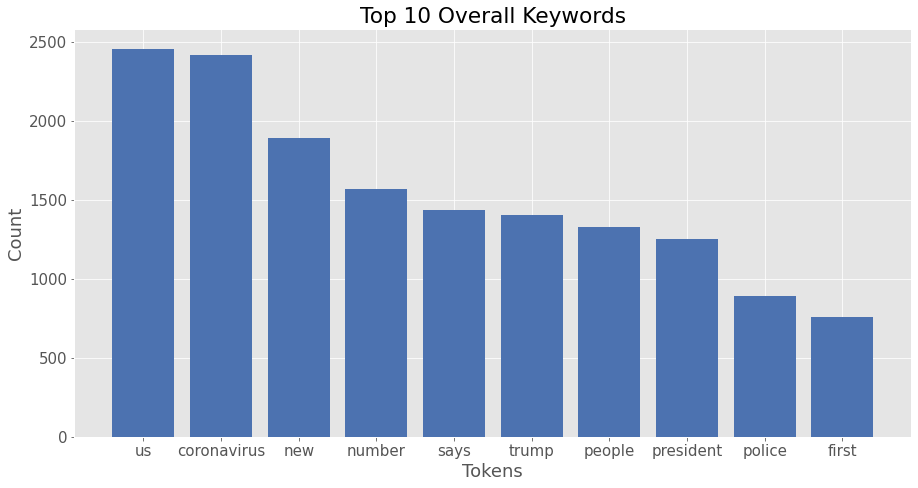

In [32]:
overall_x = data_x(top_10_bow)
overall_y = data_y(top_10_bow)

plt.figure(figsize=(15, 7.5))
plt.style.use('seaborn-deep')
plt.rcParams.update({'font.size': 15})

plt.ylabel("Count")
plt.xlabel("Tokens")
plt.title("Top 10 Overall Keywords")

plt.bar(overall_x, overall_y)

####WordCloud

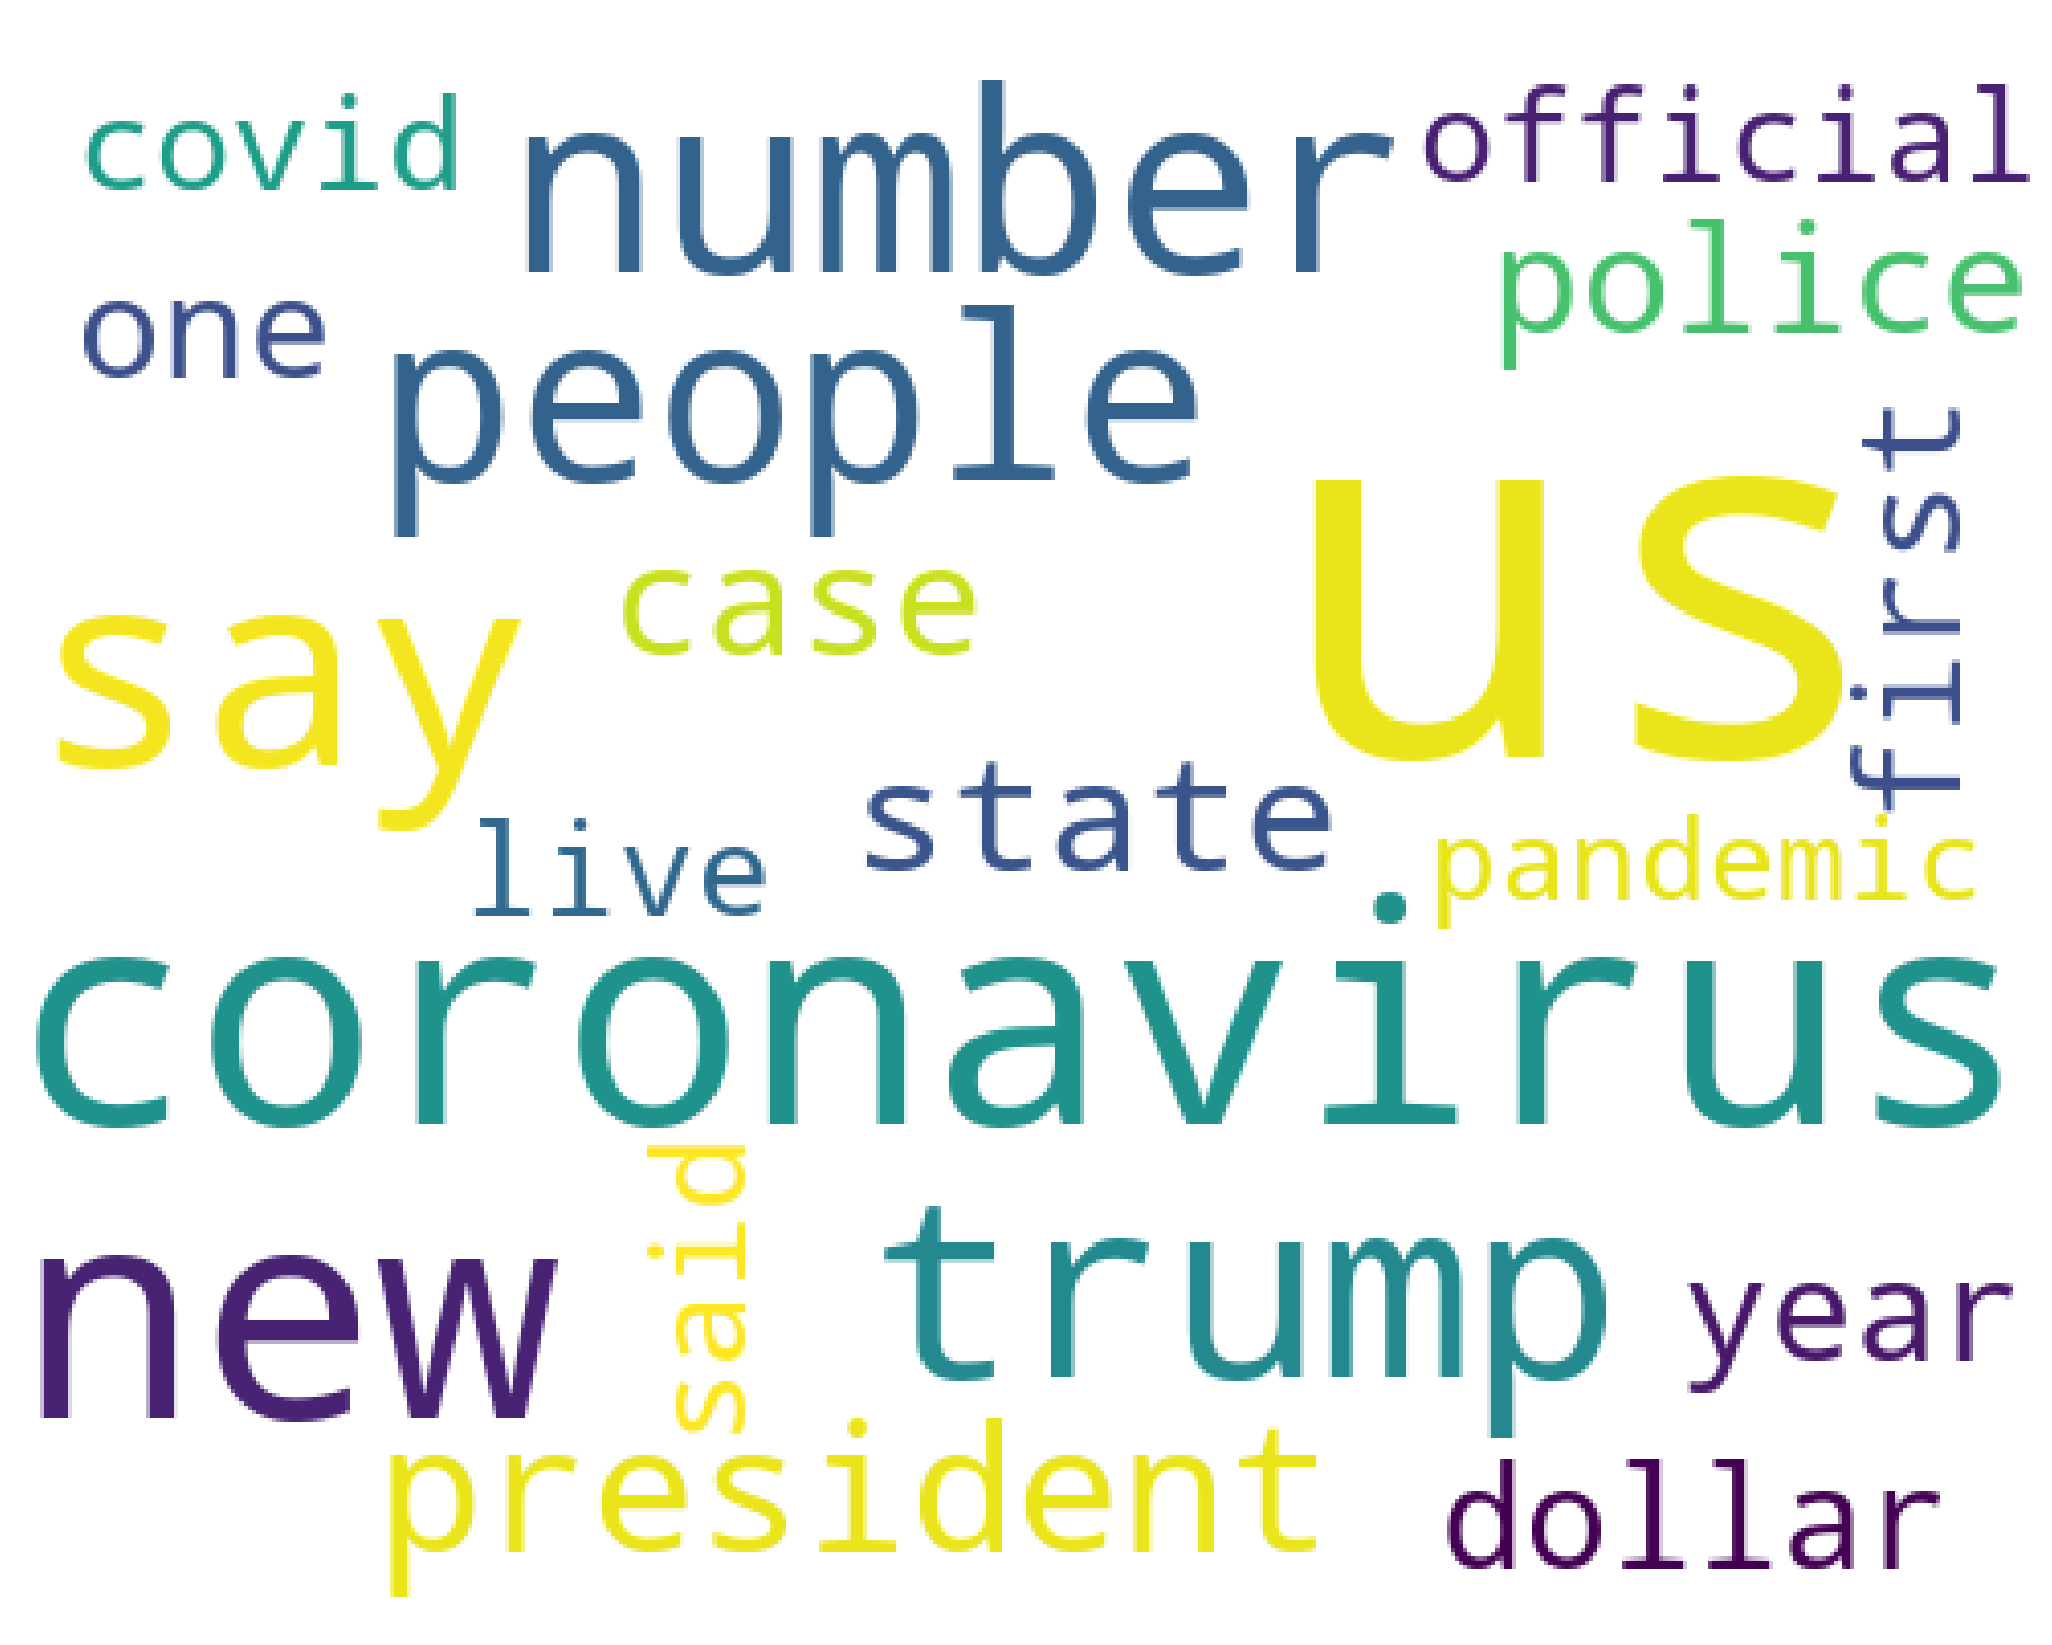

In [33]:
# Generate word cloud
o_wordcloud = WordCloud(width = 500, height = 400, random_state=0, background_color='white', collocations=False, max_words=20).generate(bow_str)
# Plot
plot_cloud(o_wordcloud)

###BBC

####BBC Top 10 Keyword Bar Chart

<BarContainer object of 10 artists>

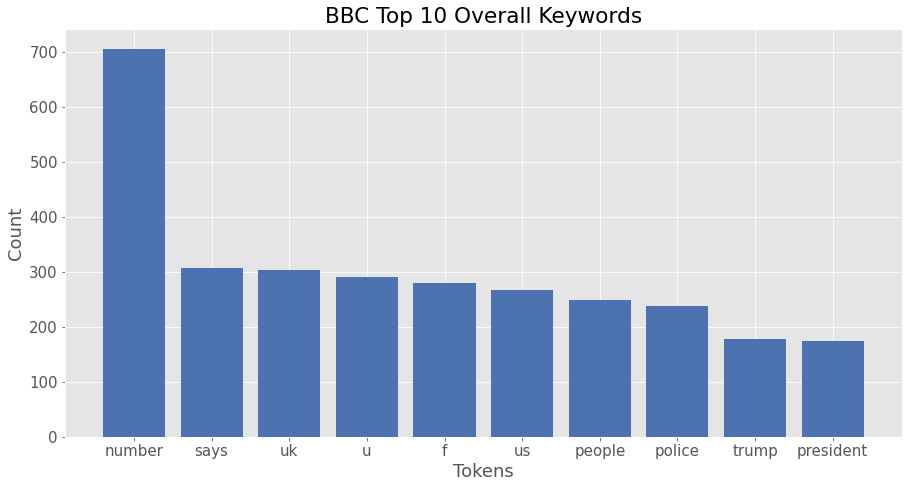

In [34]:
bbc_x = data_x(bbc_top_10)
bbc_y = data_y(bbc_top_10)

plt.figure(figsize=(15, 7.5))
plt.style.use('seaborn-deep')
plt.rcParams.update({'font.size': 15})

plt.ylabel("Count")
plt.xlabel("Tokens")
plt.title("BBC Top 10 Overall Keywords")

plt.bar(bbc_x, bbc_y)

####BBC WordCloud

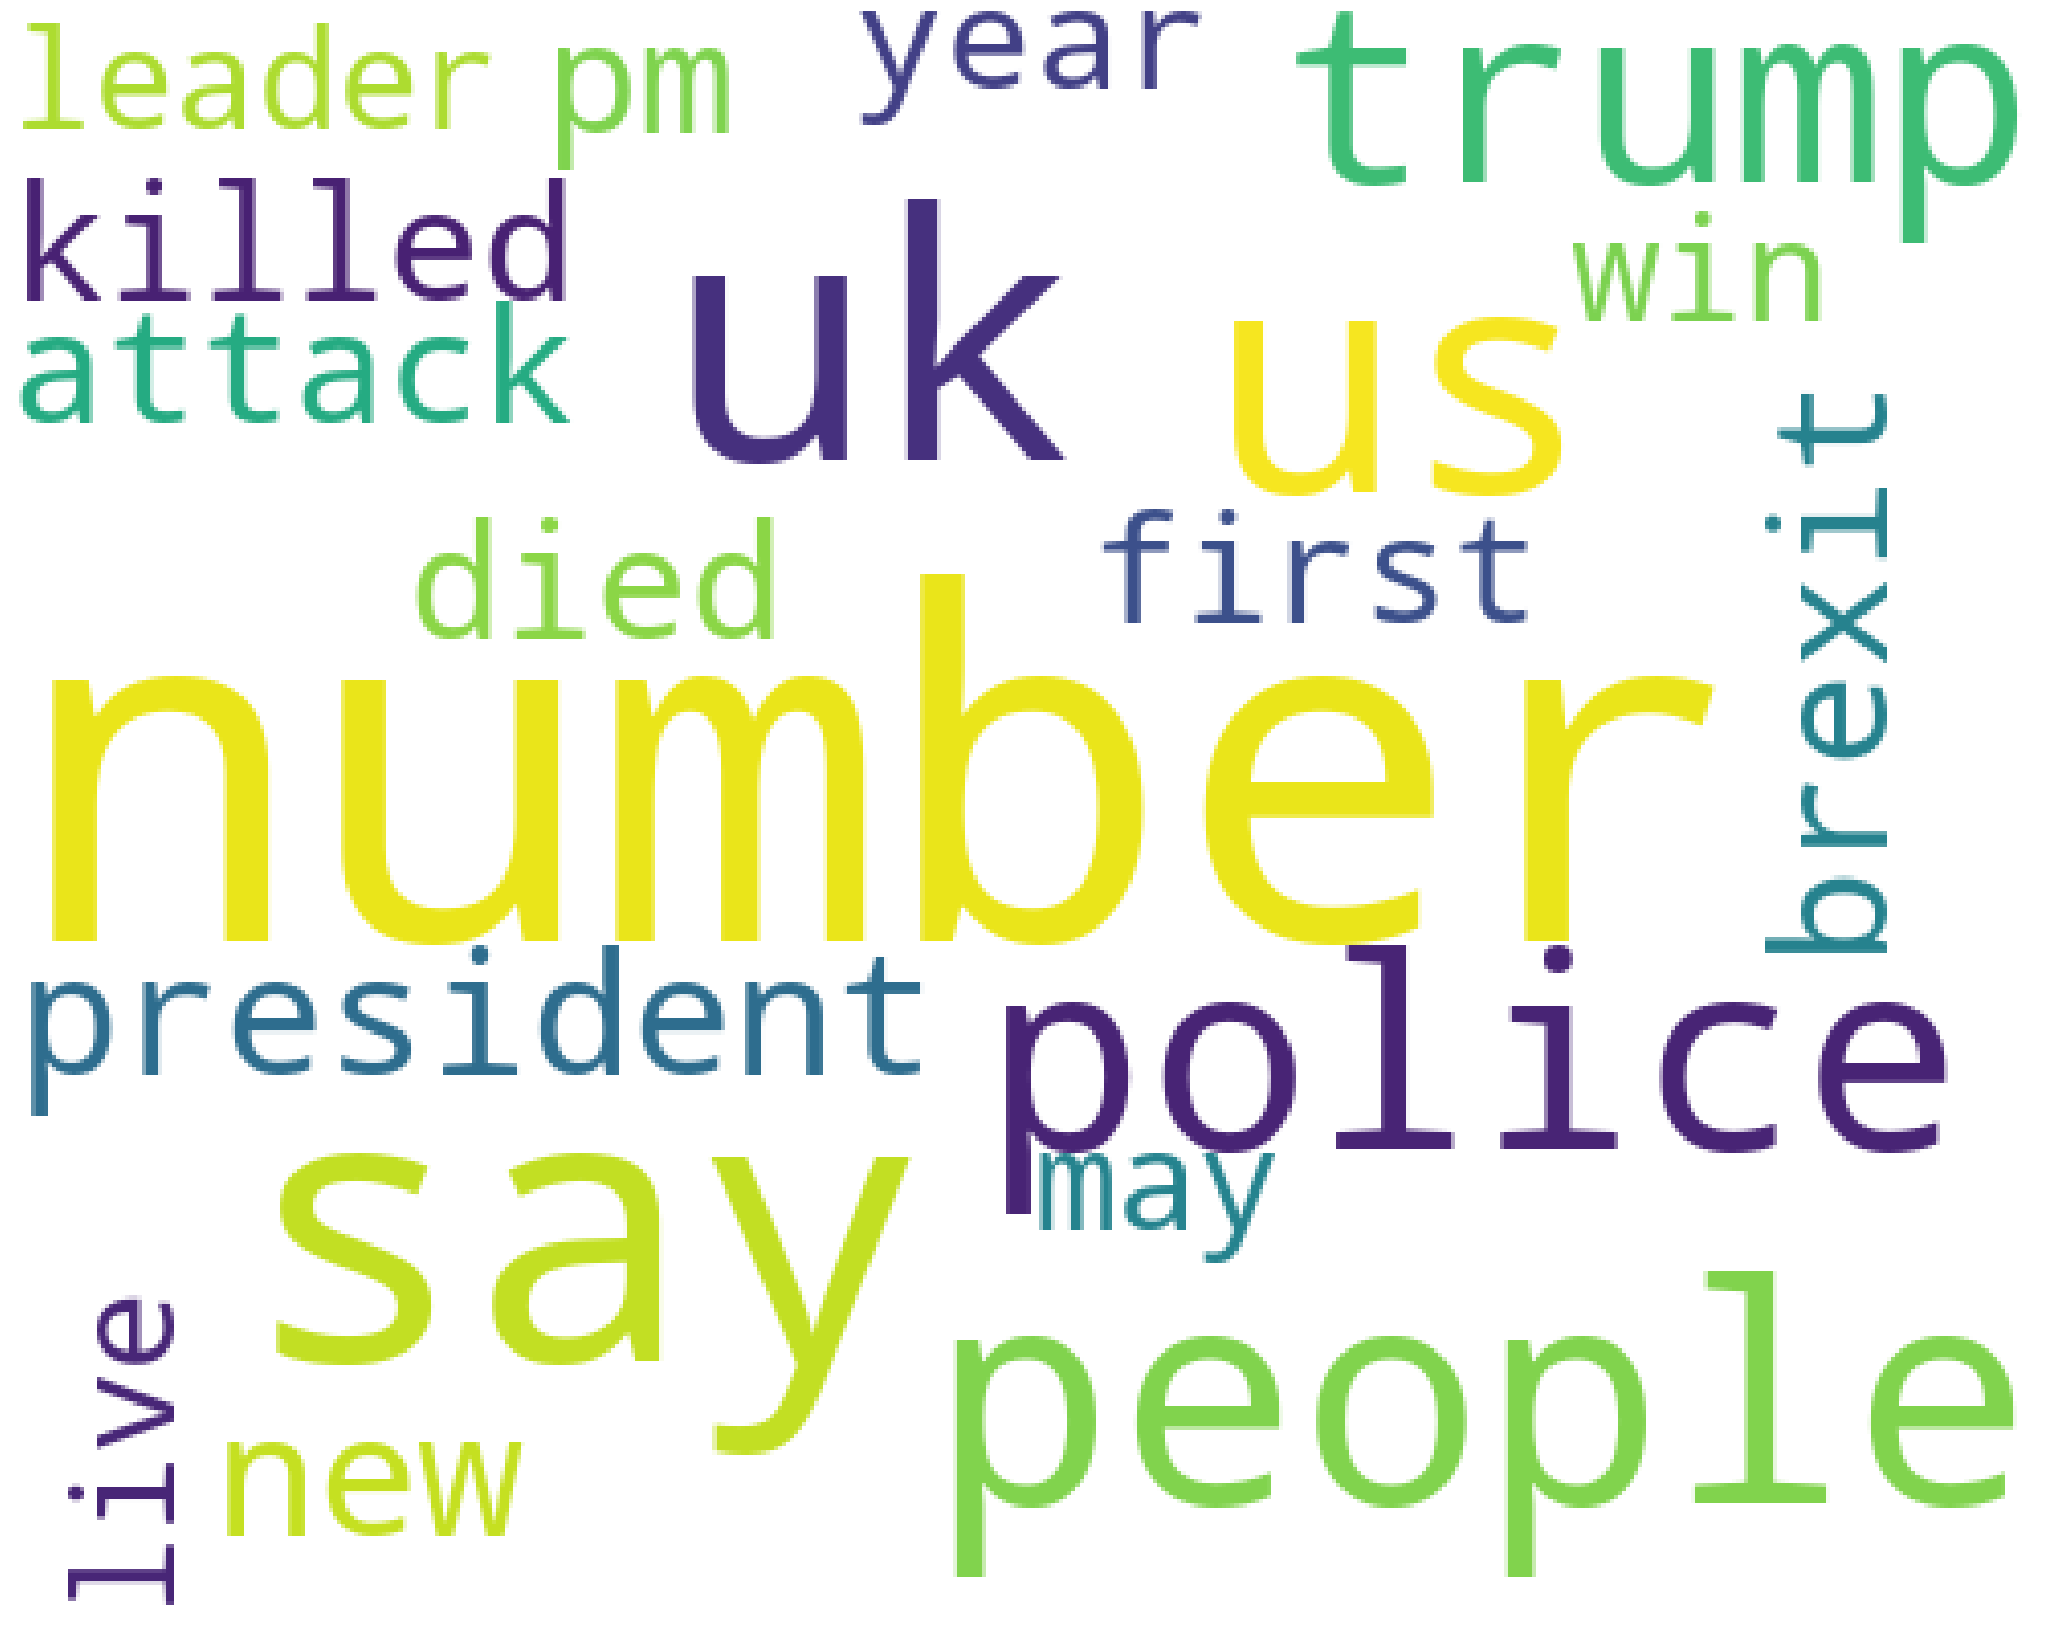

In [35]:
# Generate word cloud
bbc_wordcloud = WordCloud(width = 500, height = 400, random_state=0, background_color='white', collocations=False, max_words=20).generate(bbc_words_str)
# Plot
plot_cloud(bbc_wordcloud)

###CNN

####CNN Top 10 Keyword Bar Chart

<BarContainer object of 10 artists>

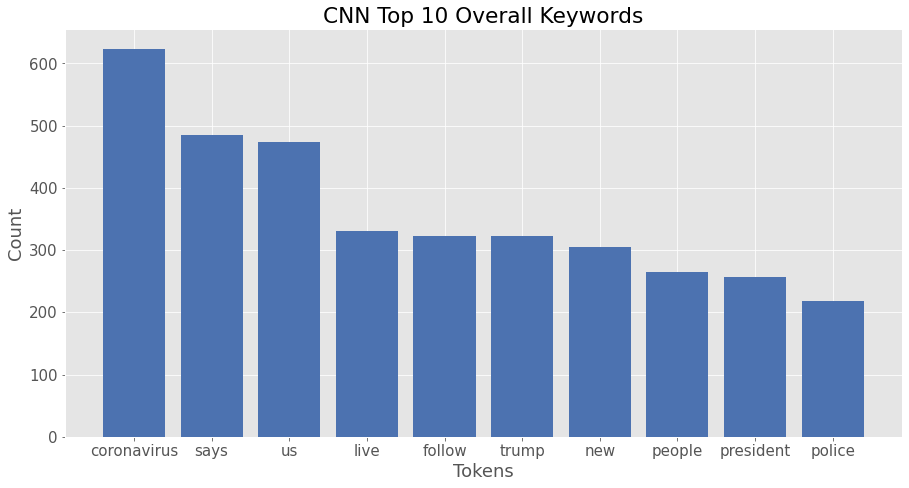

In [36]:
cnn_x = data_x(cnn_top_10)
cnn_y = data_y(cnn_top_10)

plt.figure(figsize=(15, 7.5))
plt.style.use('seaborn-deep')
plt.rcParams.update({'font.size': 15})

plt.ylabel("Count")
plt.xlabel("Tokens")
plt.title("CNN Top 10 Overall Keywords")

plt.bar(cnn_x, cnn_y)

####CNN WordCloud

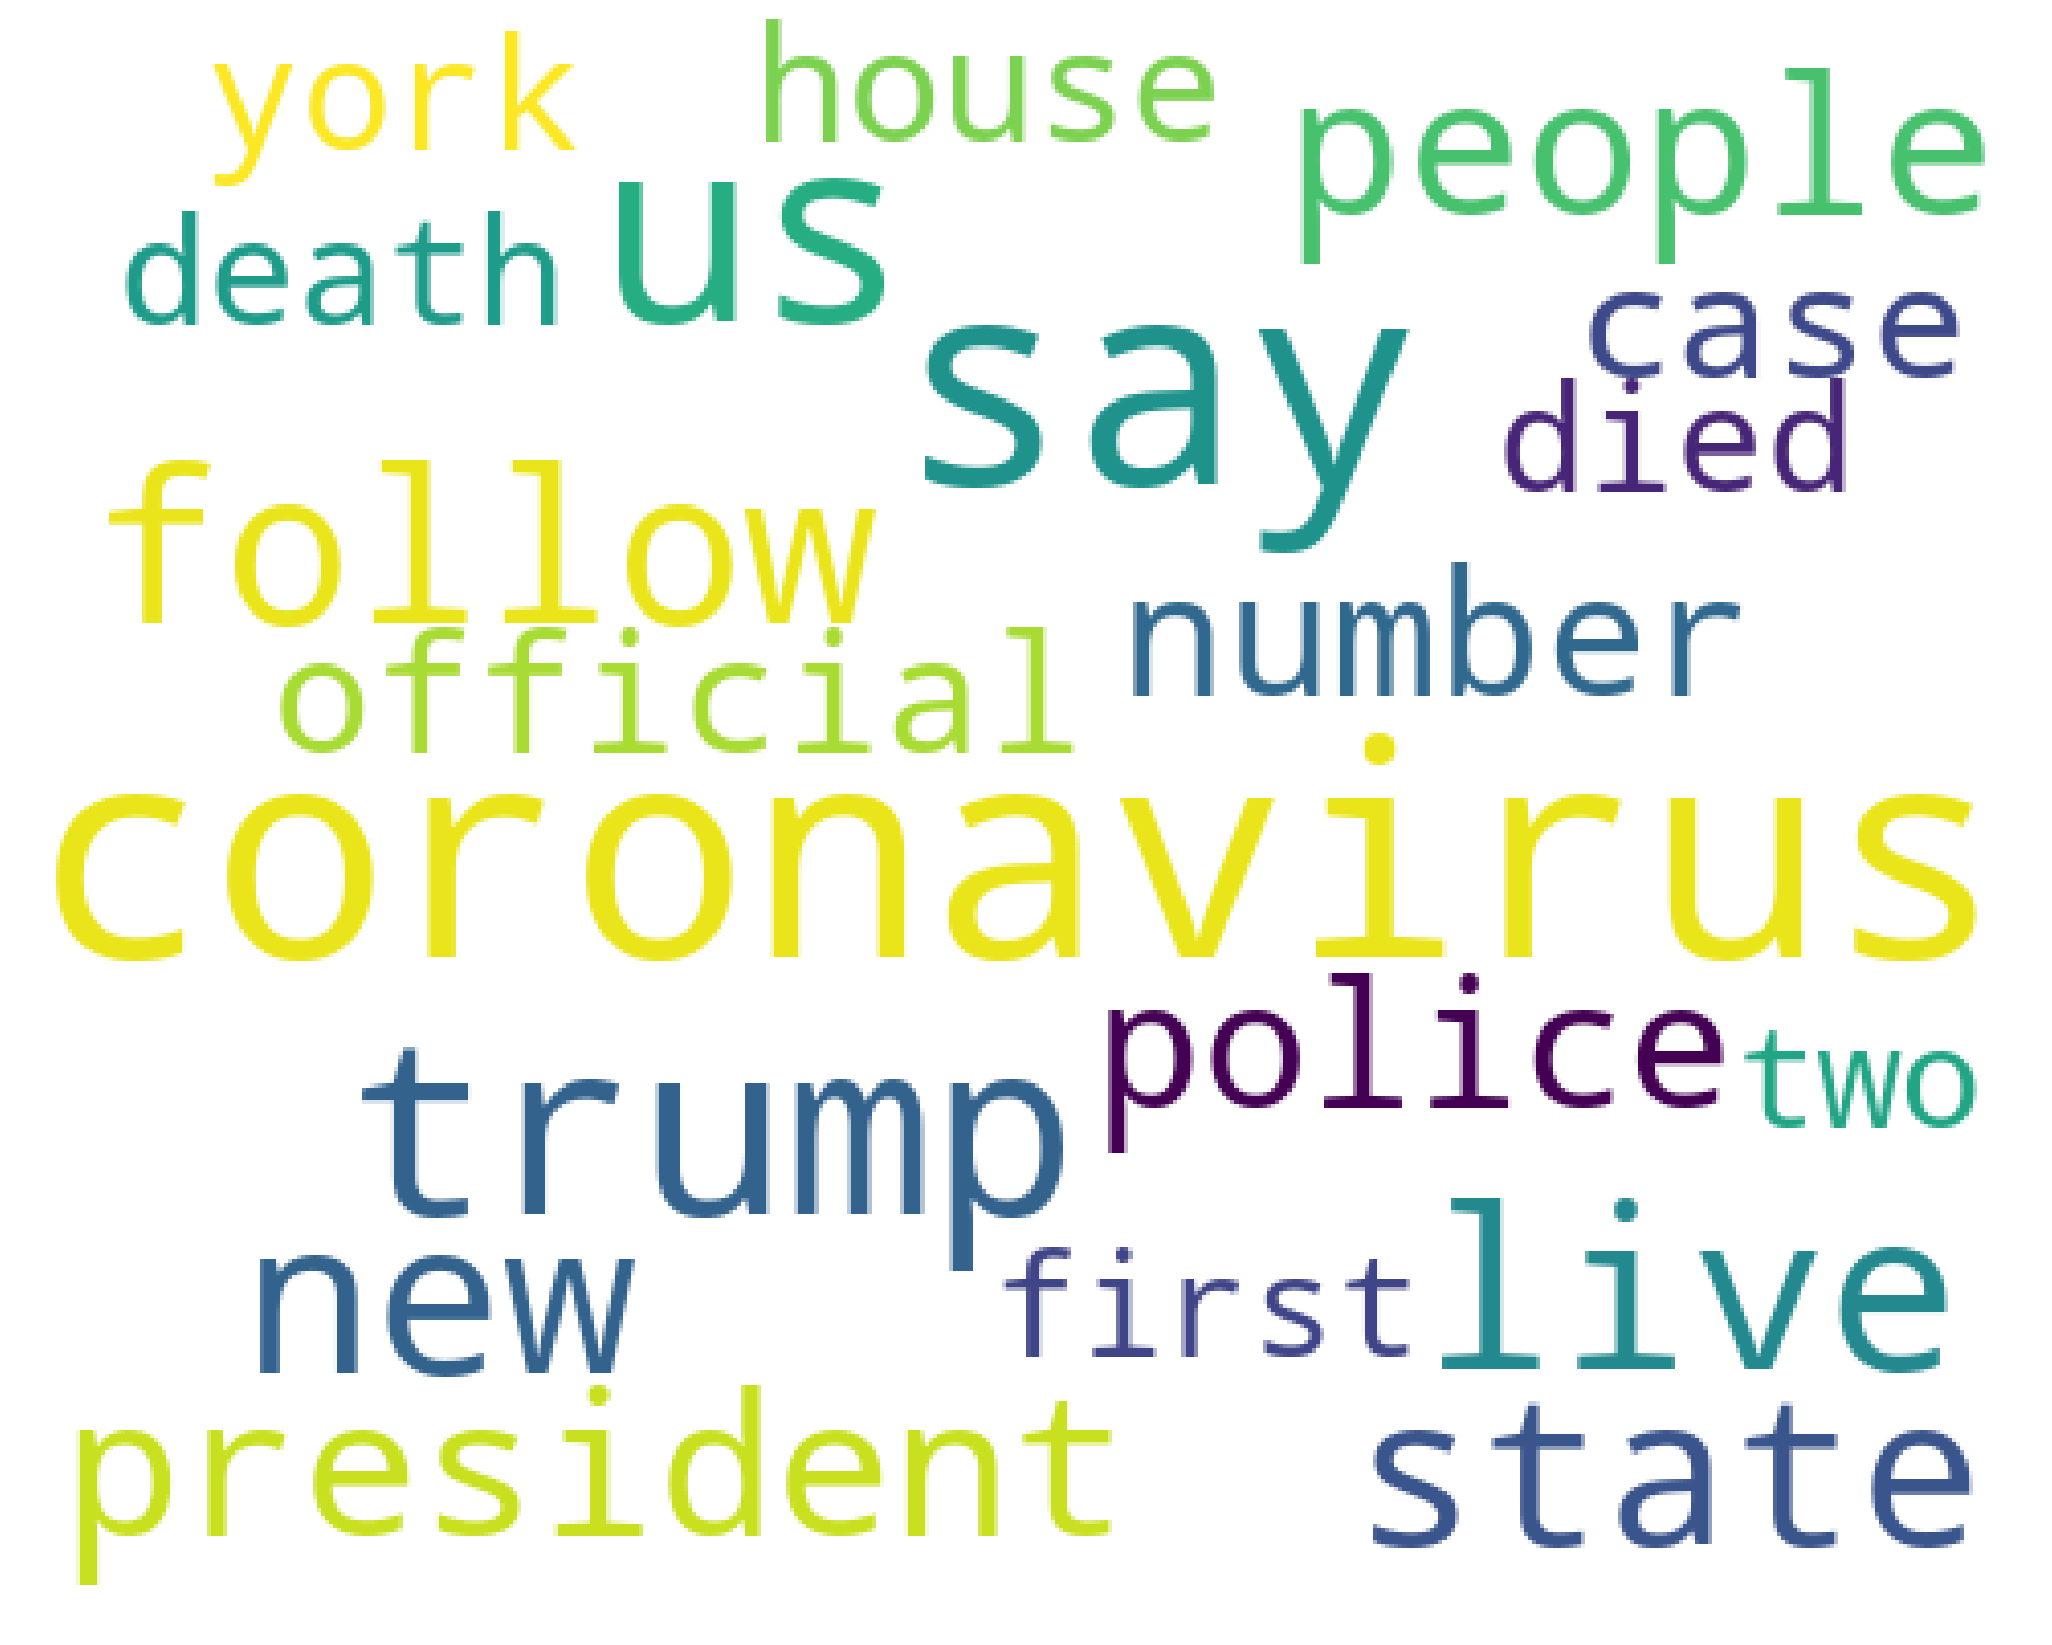

In [37]:
# Generate word cloud
cnn_wordcloud = WordCloud(width = 500, height = 400, random_state=0, background_color='white', collocations=False, max_words=20).generate(cnn_words_str)
# Plot
plot_cloud(cnn_wordcloud)

###NBC

####NBC Top 10 Keyword Bar Chart

<BarContainer object of 10 artists>

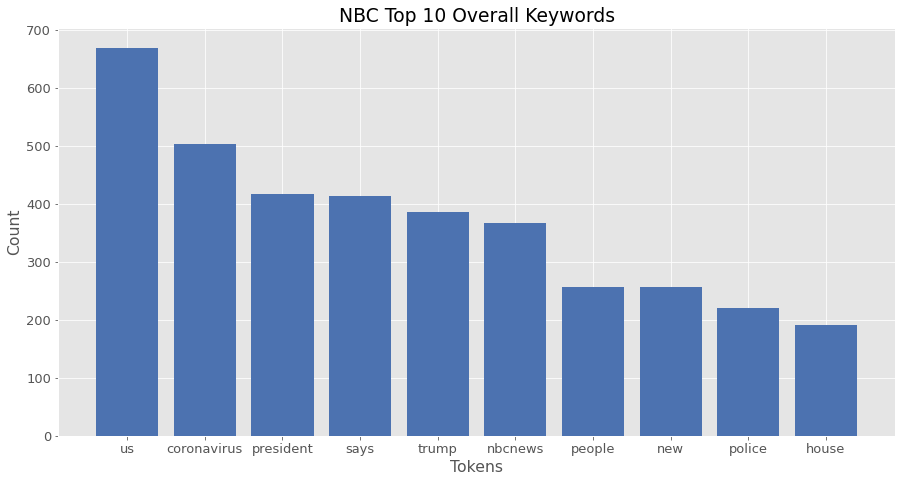

In [40]:
nbc_x = data_x(nbc_top_10)
nbc_y = data_y(nbc_top_10)

plt.figure(figsize=(15, 7.5))
plt.style.use('seaborn-deep')
plt.rcParams.update({'font.size': 13})

plt.ylabel("Count")
plt.xlabel("Tokens")
plt.title("NBC Top 10 Overall Keywords")

plt.bar(nbc_x, nbc_y)

####NBC WordCloud

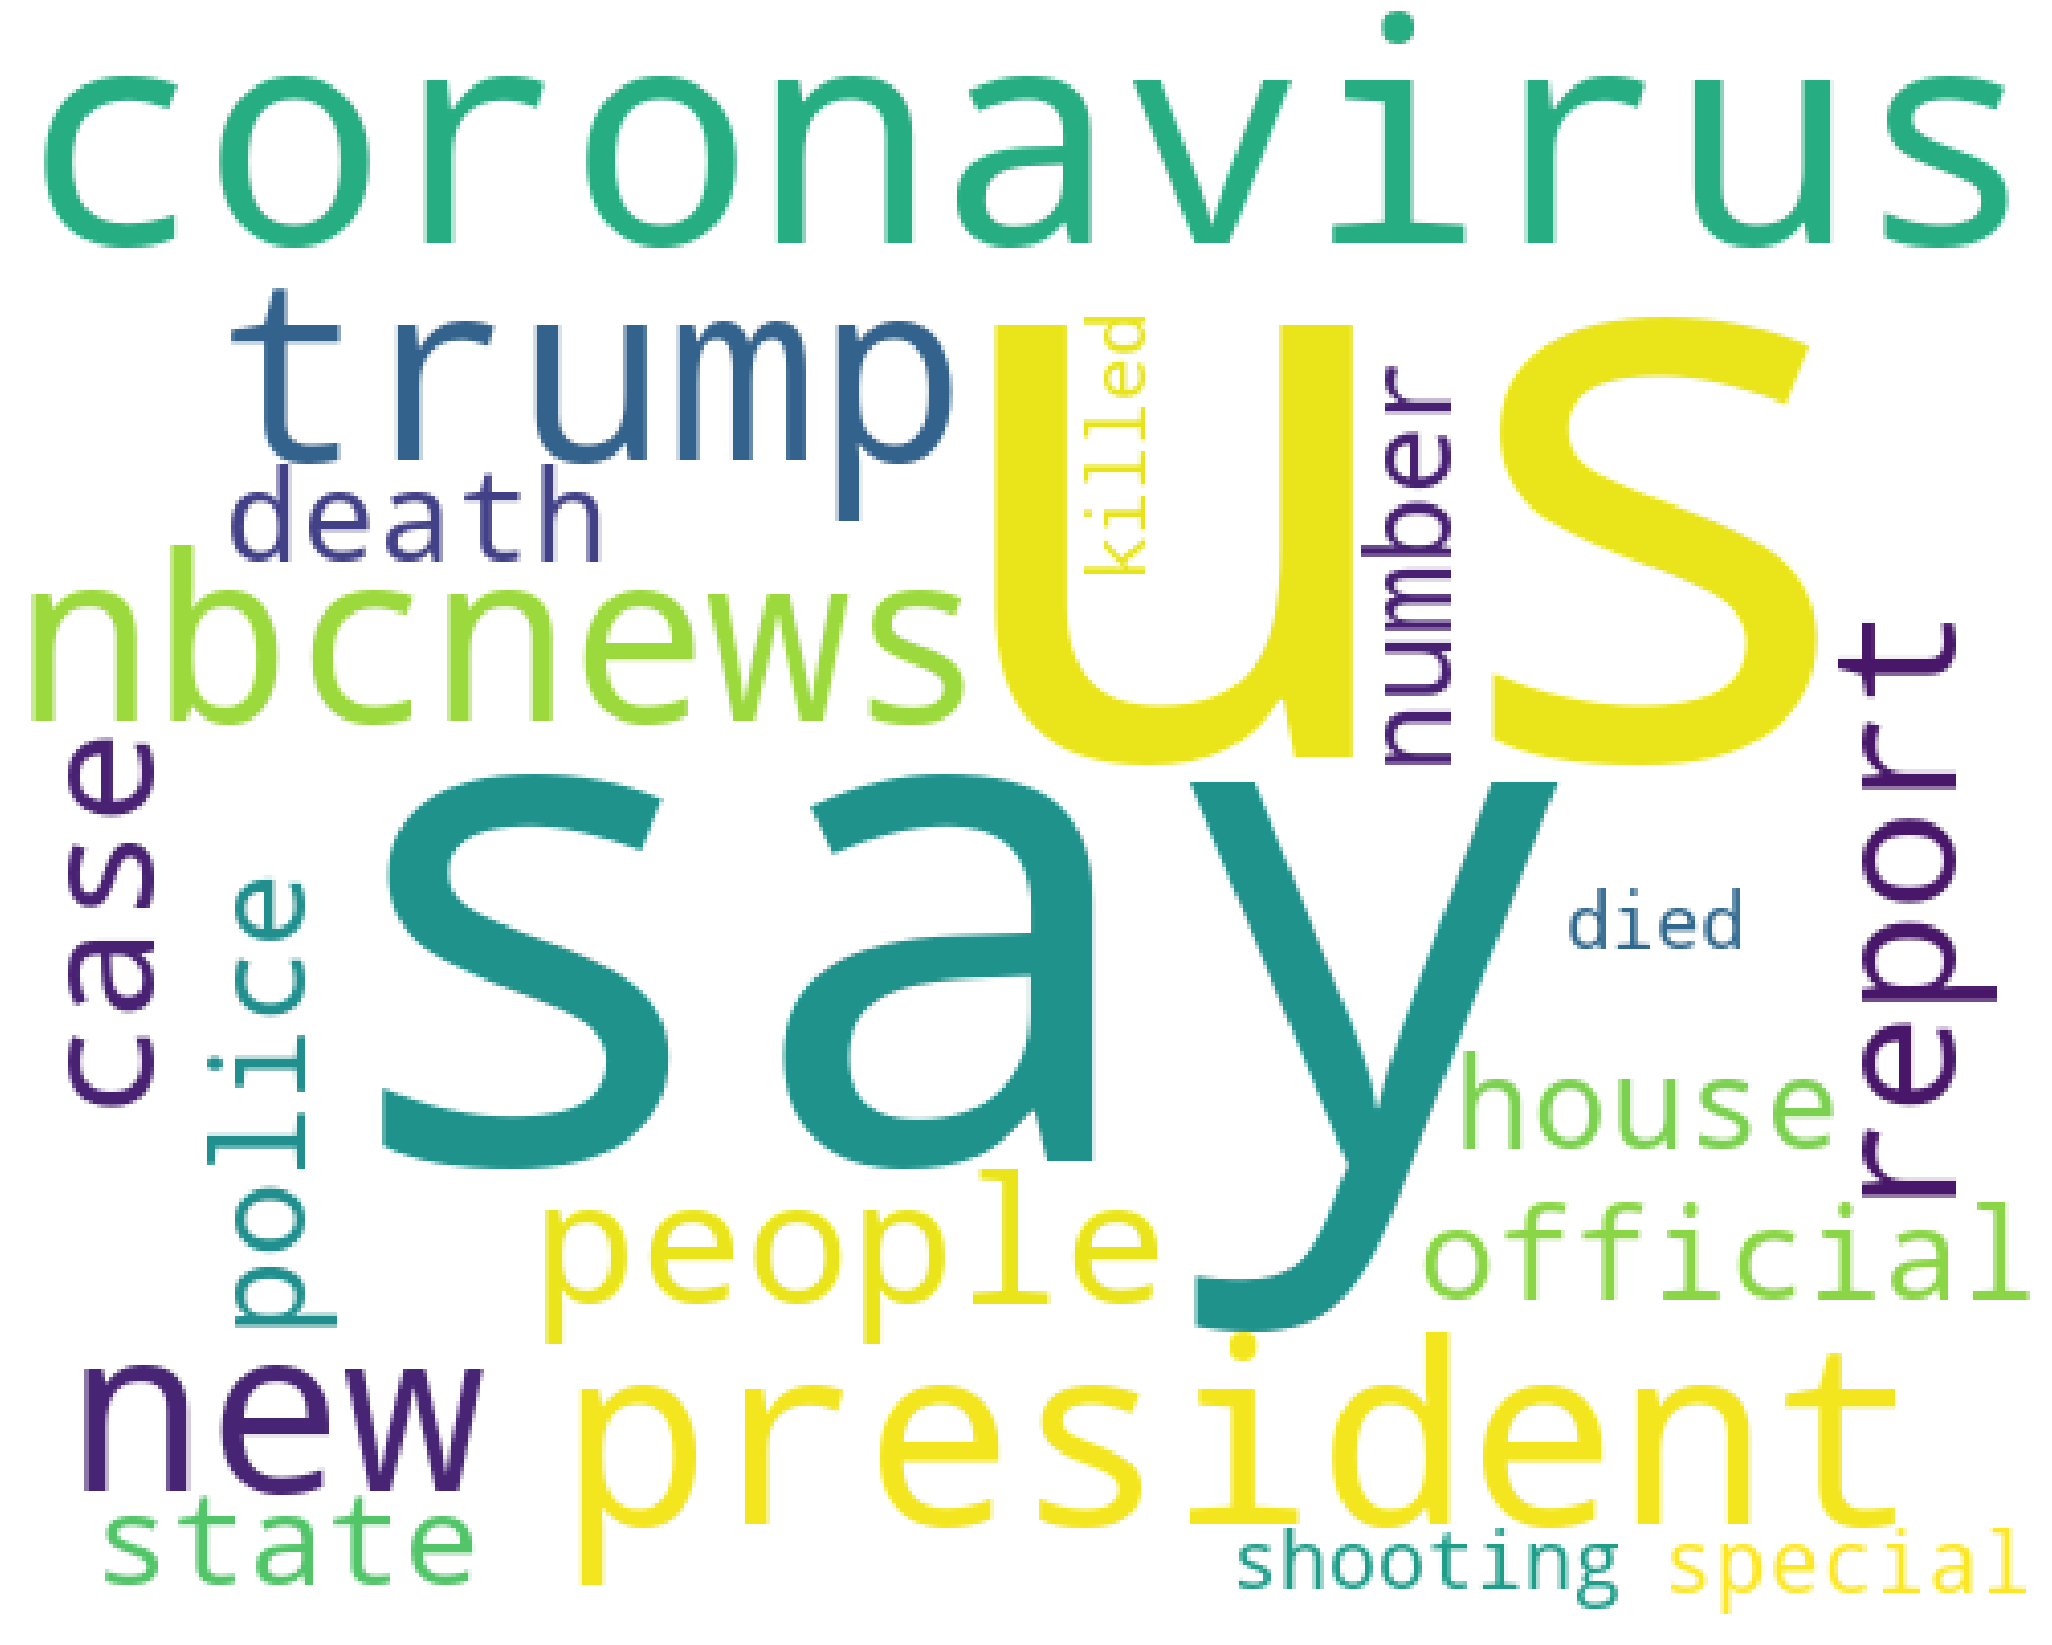

In [41]:
# Generate word cloud
nbc_wordcloud = WordCloud(width = 500, height = 400, random_state=0, background_color='white', collocations=False, max_words=20).generate(nbc_words_str)
# Plot
plot_cloud(nbc_wordcloud)

###Bloomberg

####Bloomberg Top 10 Keyword Bar Chart

<BarContainer object of 10 artists>

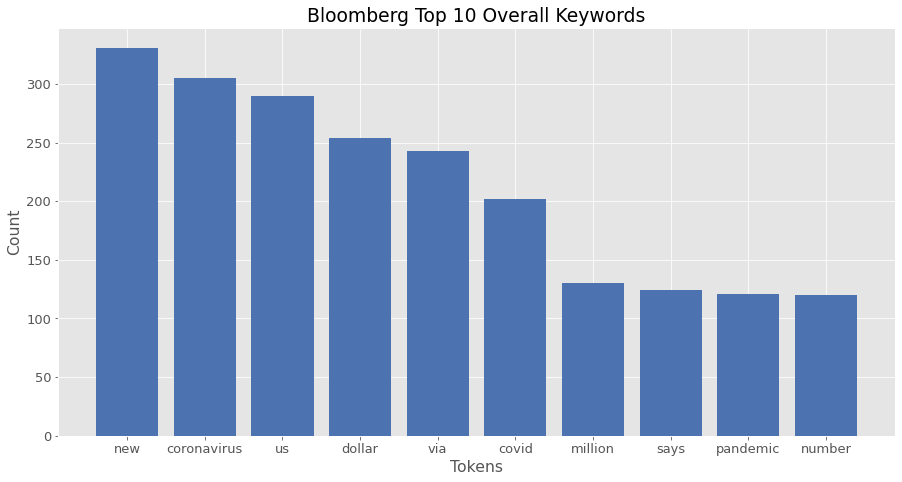

In [42]:
bloom_x = data_x(bloom_top_10)
bloom_y = data_y(bloom_top_10)

plt.figure(figsize=(15, 7.5))
plt.style.use('seaborn-deep')
plt.rcParams.update({'font.size': 13})

plt.ylabel("Count")
plt.xlabel("Tokens")
plt.title("Bloomberg Top 10 Overall Keywords")

plt.bar(bloom_x, bloom_y)

####Bloomberg WordCloud

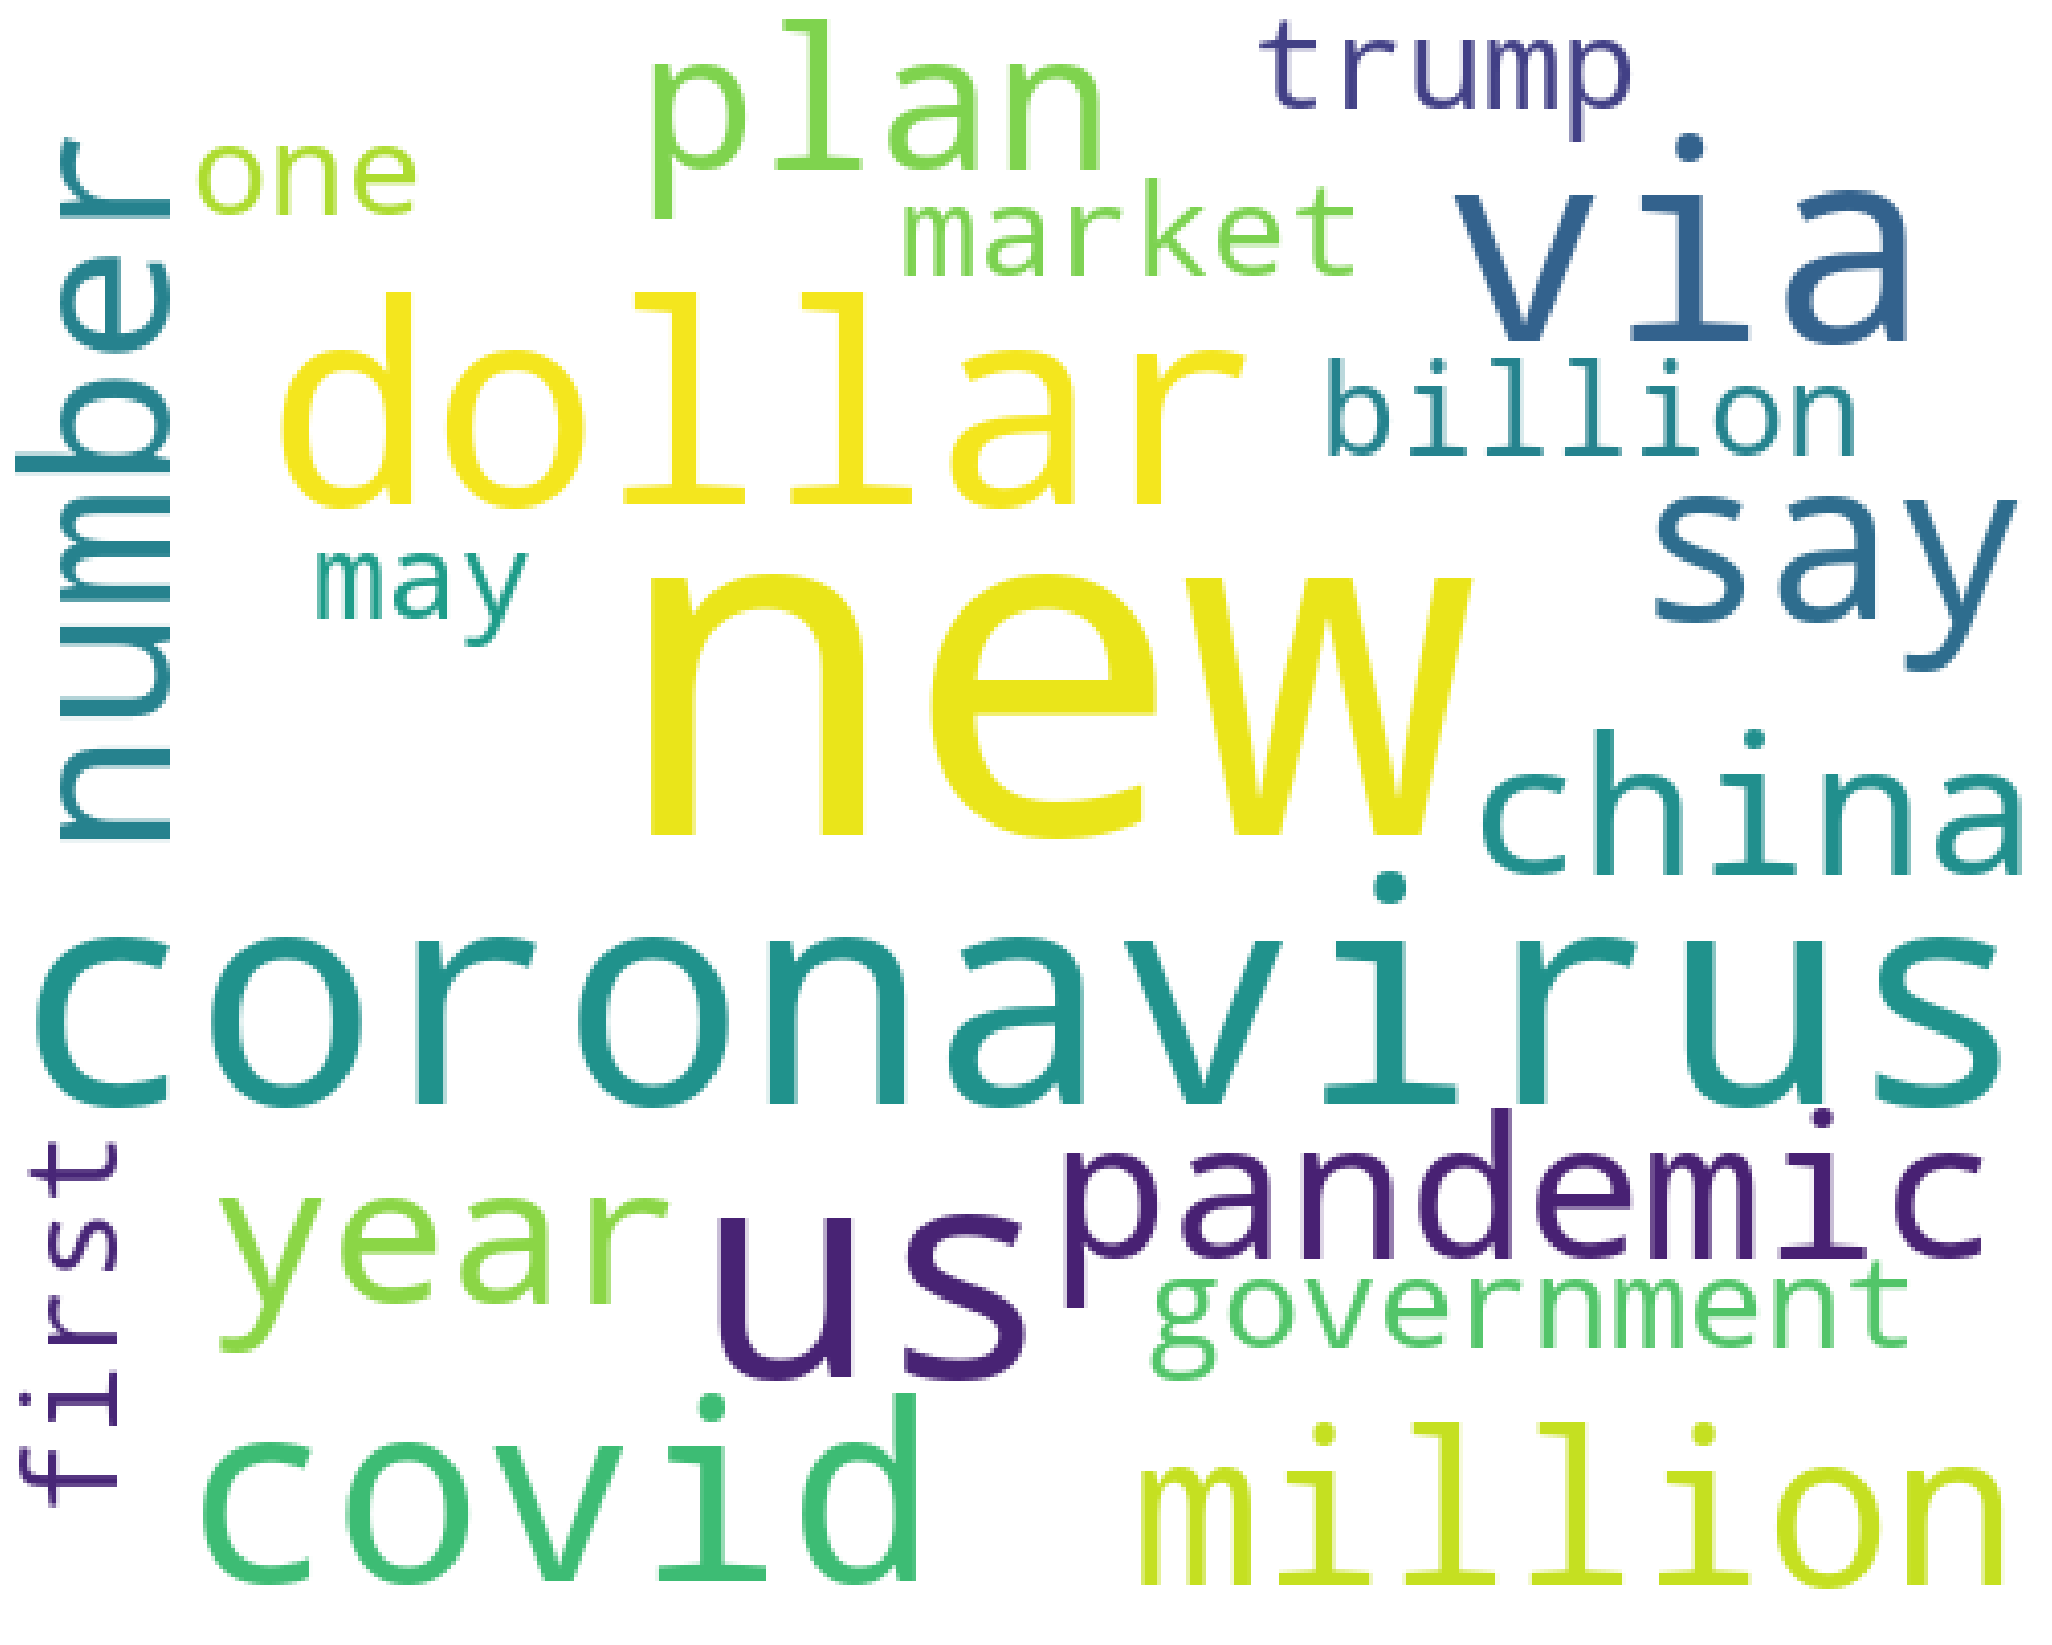

In [43]:
# Generate word cloud
bloom_wordcloud = WordCloud(width = 500, height = 400, random_state=0, background_color='white', collocations=False, max_words=20).generate(bloom_words_str)
# Plot
plot_cloud(bloom_wordcloud)

###NYT

####NYT Top 10 Keyword Bar Chart

<BarContainer object of 10 artists>

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 148 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 148 missing from current font.
  font.set_text(s, 0, flags=flags)


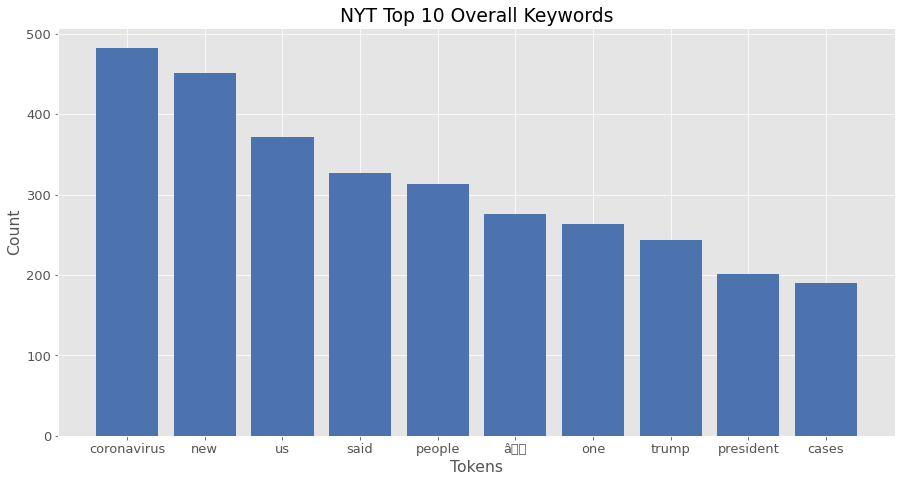

In [44]:
nyt_x = data_x(nyt_top_10)
nyt_y = data_y(nyt_top_10)

plt.figure(figsize=(15, 7.5))
plt.style.use('seaborn-deep')
plt.rcParams.update({'font.size': 13})

plt.ylabel("Count")
plt.xlabel("Tokens")
plt.title("NYT Top 10 Overall Keywords")

plt.bar(nyt_x, nyt_y)

####NYT WordCloud

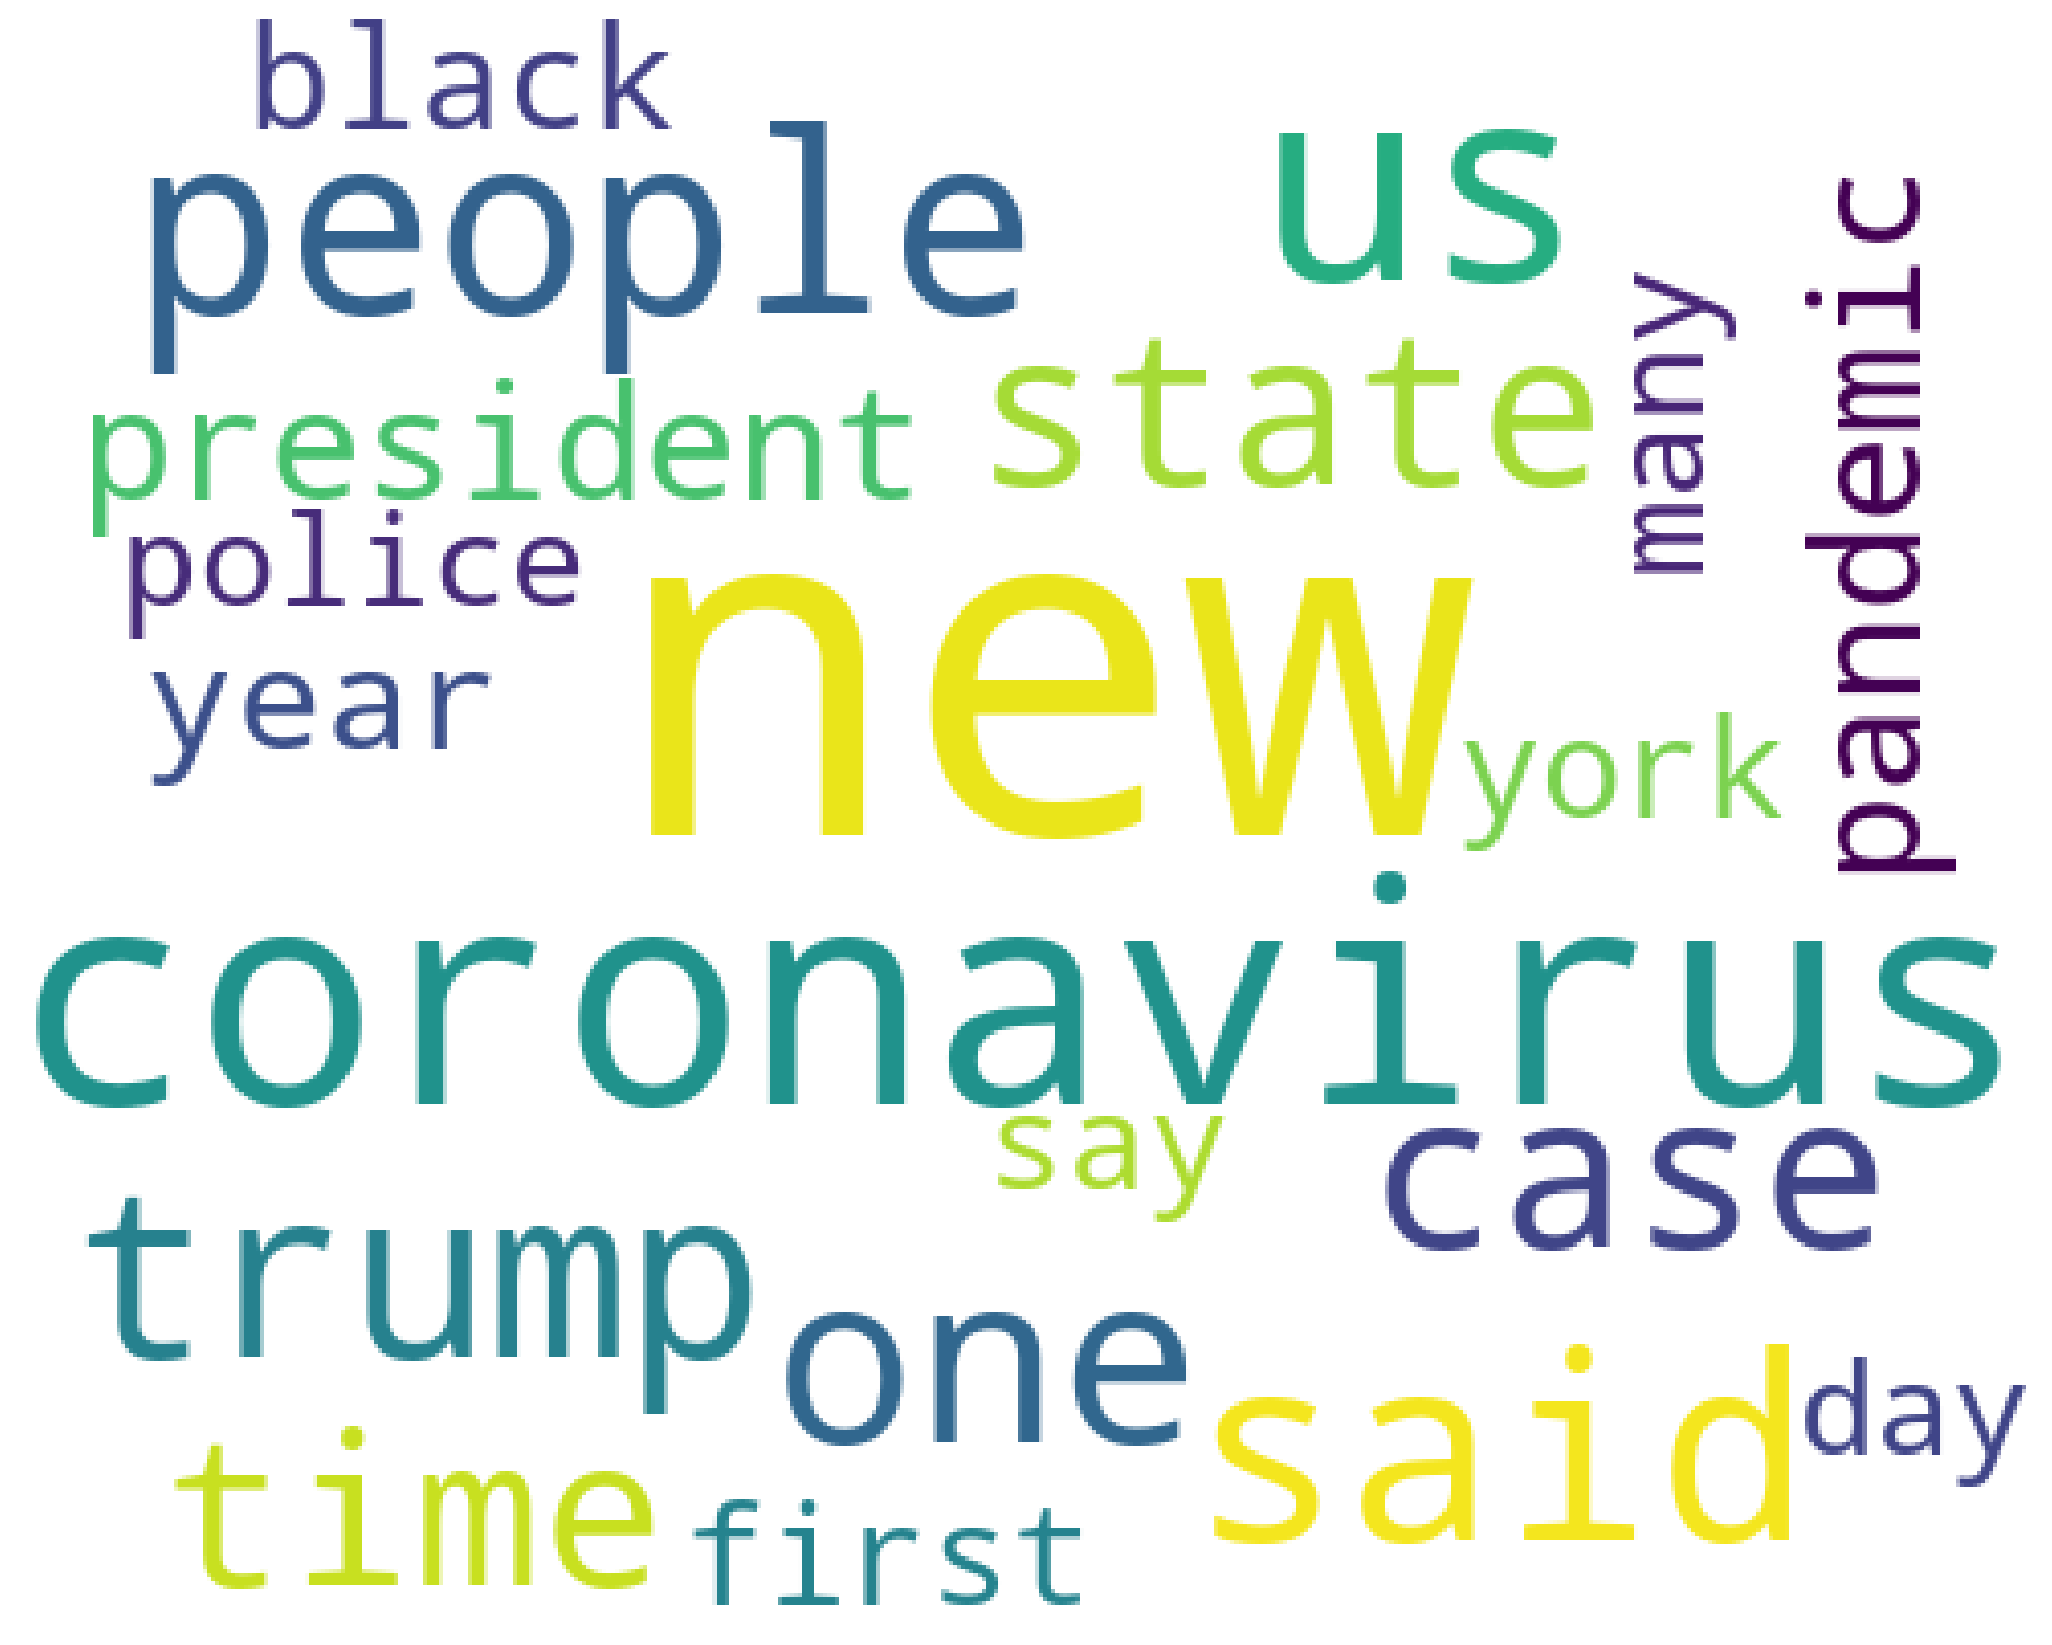

In [45]:
# Generate word cloud
nyt_wordcloud = WordCloud(width = 500, height = 400, random_state=0, background_color='white', collocations=False, max_words=20).generate(nyt_words_str)
# Plot
plot_cloud(nyt_wordcloud)

###WSJ

####WSJ Top 10 Keyword Bar Chart

<BarContainer object of 10 artists>

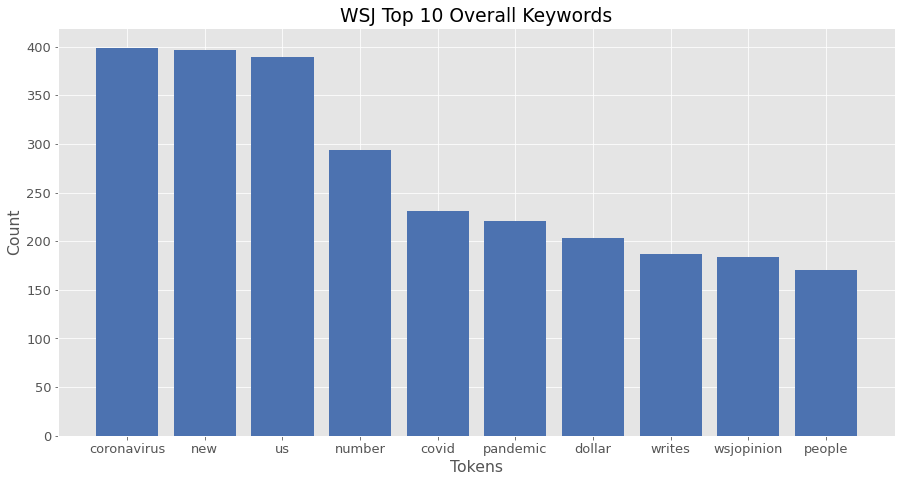

In [46]:
wsj_x = data_x(wsj_top_10)
wsj_y = data_y(wsj_top_10)

plt.figure(figsize=(15, 7.5))
plt.style.use('seaborn-deep')
plt.rcParams.update({'font.size': 13})

plt.ylabel("Count")
plt.xlabel("Tokens")
plt.title("WSJ Top 10 Overall Keywords")

plt.bar(wsj_x, wsj_y)

####WSJ WordCloud

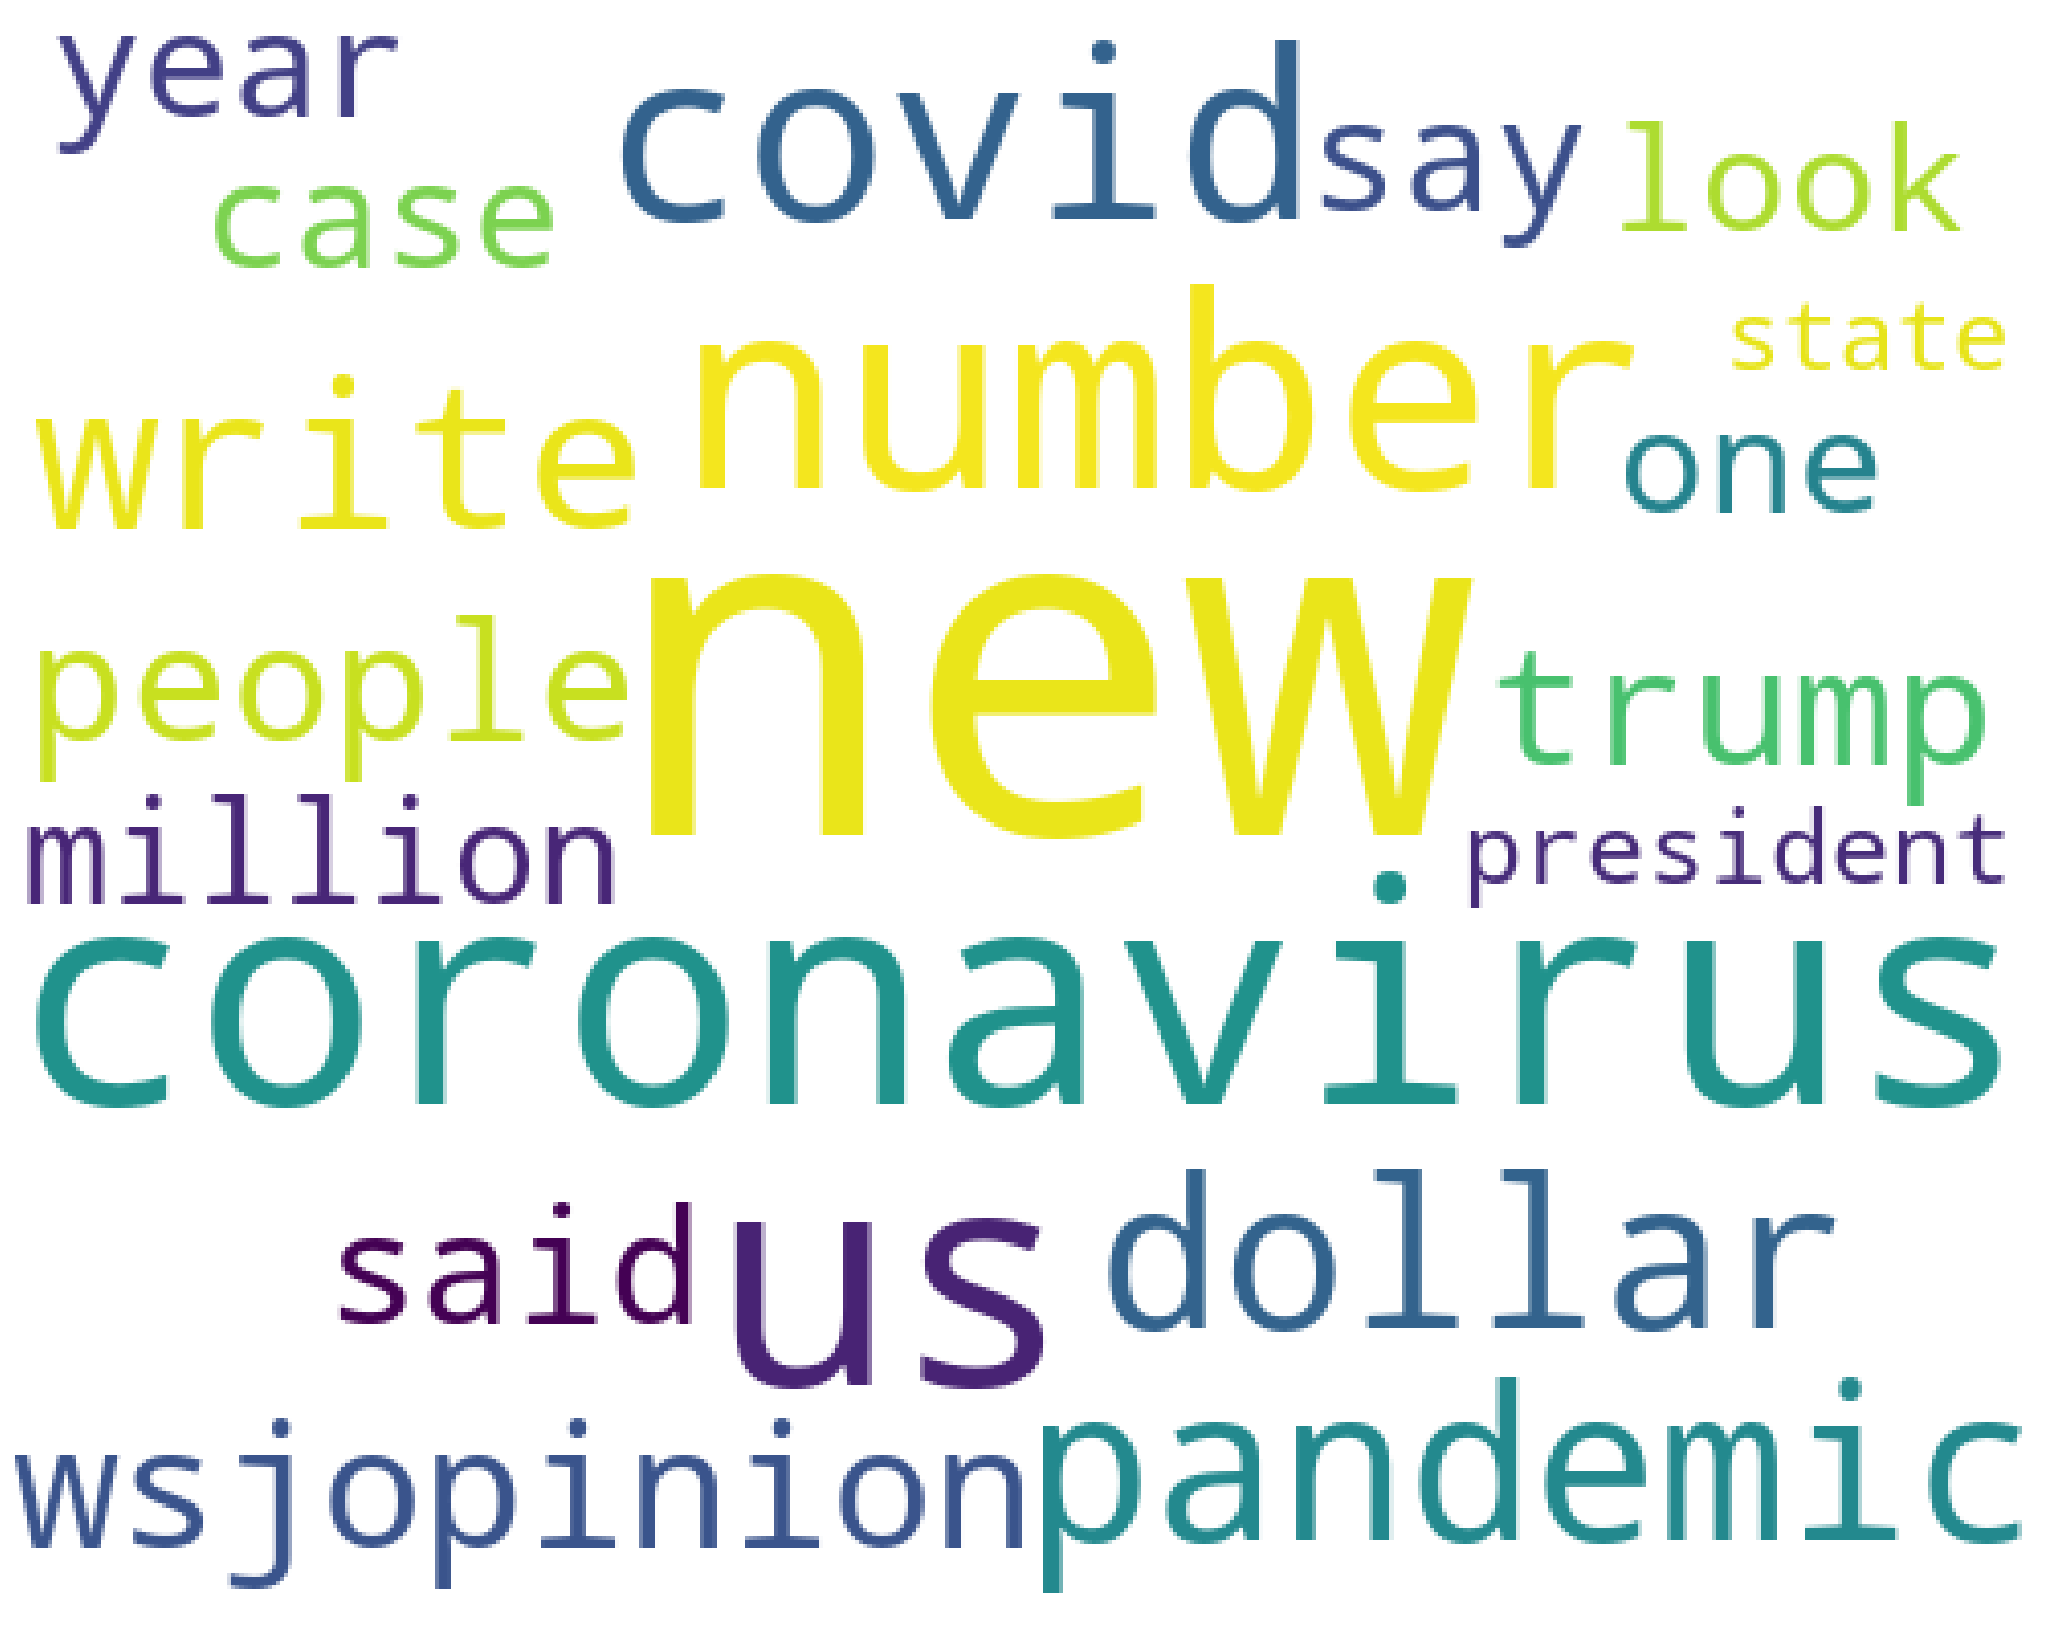

In [47]:
# Generate word cloud
wsj_wordcloud = WordCloud(width = 500, height = 400, random_state=0, background_color='white', collocations=False, max_words=20).generate(wsj_words_str)
# Plot
plot_cloud(wsj_wordcloud)